<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [8]:
xls = pd.ExcelFile("data/bank_term_deposit_marketing_analysis.xlsx")

In [ ]:
xls

In [10]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [11]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [12]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [13]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [14]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [15]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [16]:
df = pd.merge(client_info, loan_history, on = ['ID'])
df = pd.merge(df, marketing_history, on = ['ID'])
f = pd.merge(df, subscription_history, on = ['ID'])


In [17]:
f.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
f = f.drop(['ID'], axis = 1)

### Task 4: Data Prep & Start H2O

In [21]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwjkkt8yp
  JVM stdout: /tmp/tmpwjkkt8yp/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpwjkkt8yp/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_rhyme_0zw2ka
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [22]:
h2o_df = h2o.H2OFrame(f)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [25]:
train, test = h2o_df.split_frame(ratios=[0.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [26]:
from h2o.automl import H2OAutoML

In [28]:
f.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [30]:
aml = H2OAutoML(max_runtime_secs = 600,
               balance_classes = True,
                stopping_metric = 'logloss',
               project_name = 'Final',
               seed = 1)
%time aml.train(x = x, y=y,training_frame =train)



AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 18s, sys: 1.11 s, total: 1min 19s
Wall time: 9min 54s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [31]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200701_164835,0.934276,0.219814,0.619571,0.161927,0.25605,0.0655617
XGBoost_grid__1_AutoML_20200701_164835_model_2,0.933865,0.200056,0.616079,0.173076,0.250656,0.0628286
StackedEnsemble_AllModels_AutoML_20200701_164835,0.932851,0.210447,0.619098,0.166588,0.252839,0.0639273
XGBoost_grid__1_AutoML_20200701_164835_model_1,0.93116,0.203857,0.608868,0.171066,0.252697,0.0638557
GBM_grid__1_AutoML_20200701_164835_model_2,0.930714,0.208994,0.605766,0.175332,0.257204,0.066154
GBM_grid__1_AutoML_20200701_164835_model_1,0.930158,0.2035,0.600273,0.169363,0.253197,0.0641087
XGBoost_grid__1_AutoML_20200701_164835_model_5,0.928346,0.207813,0.604412,0.16975,0.253114,0.0640667
GBM_5_AutoML_20200701_164835,0.92799,0.246649,0.591912,0.17399,0.278715,0.0776821
XGBoost_grid__1_AutoML_20200701_164835_model_4,0.927783,0.215643,0.587153,0.176411,0.259041,0.0671023
GBM_2_AutoML_20200701_164835,0.927344,0.229521,0.59769,0.163053,0.268905,0.0723098


In [33]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [34]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20200701_164835_model_2',
  0.834597753063705,
  1.0,
  0.5486958303248536),
 ('GBM_grid__1_AutoML_20200701_164835_model_2',
  0.39629370713043605,
  0.47483198424114004,
  0.26053832985799014),
 ('DeepLearning_1_AutoML_20200701_164835',
  0.1978373636016488,
  0.23704516681888052,
  0.13006569463217907),
 ('DRF_1_AutoML_20200701_164835',
  0.053706752450813154,
  0.06435046374575334,
  0.03530883113676552),
 ('XRT_1_AutoML_20200701_164835',
  0.038621641501131745,
  0.046275755427517606,
  0.025391314048211624),
 ('GLM_1_AutoML_20200701_164835', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [35]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200701_164835_model_2')

In [36]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06123605791339591
RMSE: 0.24745920454369022
LogLoss: 0.19476955771131327
Mean Per-Class Error: 0.12522626536083026
AUC: 0.9374734112133587
AUCPR: 0.6453600529141296
Gini: 0.8749468224267174

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26374057748100976: 


,,no,yes,Error,Rate
0,no,9185.0,790.0,0.0792,(790.0/9975.0)
1,yes,343.0,979.0,0.2595,(343.0/1322.0)
2,Total,9528.0,1769.0,0.1003,(1133.0/11297.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.263741,0.633452,223.0
1,max f2,0.110774,0.744734,295.0
2,max f0point5,0.449269,0.622180,154.0
3,max accuracy,0.457186,0.911658,151.0
4,max precision,0.986848,1.000000,0.0
5,max recall,0.000652,1.000000,398.0
6,max specificity,0.986848,1.000000,0.0
7,max absolute_mcc,0.218602,0.587909,242.0
8,max min_per_class_accuracy,0.137989,0.868070,279.0
9,max mean_per_class_accuracy,0.110774,0.874774,295.0



Gains/Lift Table: Avg response rate: 11.70 %, avg score: 11.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.883364,7.411043,7.411043,0.867257,0.926608,0.867257,0.926608,0.074130,0.074130,641.104253,641.104253
1,,2,0.020005,0.810272,6.579191,6.995117,0.769912,0.845717,0.818584,0.886162,0.065809,0.139939,557.919082,599.511668
2,,3,0.030008,0.744933,5.822962,6.604398,0.681416,0.777017,0.772861,0.849781,0.058245,0.198185,482.296199,560.439845
3,,4,0.040011,0.687083,5.898585,6.427945,0.690265,0.716930,0.752212,0.816568,0.059002,0.257186,489.858487,542.794506
4,,5,0.050013,0.638194,5.369225,6.216201,0.628319,0.660317,0.727434,0.785318,0.053707,0.310893,436.922469,521.620098
5,,6,0.100027,0.442487,4.779366,5.497784,0.559292,0.535240,0.643363,0.660279,0.239032,0.549924,377.936621,449.778359
6,,7,0.150040,0.281155,3.418154,4.804574,0.400000,0.359766,0.562242,0.560108,0.170953,0.720877,241.815431,380.457383
7,,8,0.200053,0.166786,2.238437,4.163040,0.261947,0.218660,0.487168,0.474746,0.111952,0.832829,123.843734,316.303971
8,,9,0.299991,0.067990,1.165624,3.164491,0.136404,0.107331,0.370316,0.352347,0.116490,0.949319,16.562392,216.449075
9,,10,0.400018,0.032665,0.310054,2.450724,0.036283,0.047368,0.286789,0.276085,0.031014,0.980333,-68.994618,145.072360


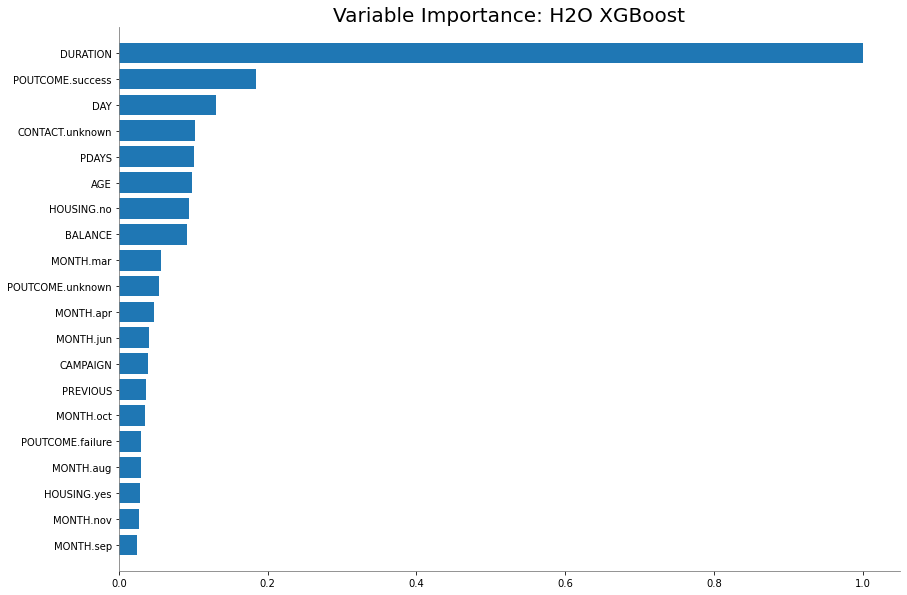

In [40]:
model.varimp_plot(num_of_features=20)